In [31]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image

(np.float64(-0.5), np.float64(99.5), np.float64(99.5), np.float64(-0.5))

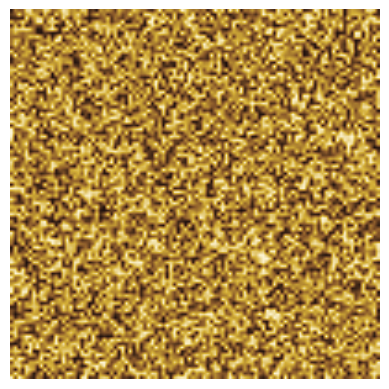

In [32]:
# Parametry
a = 2.8e-4
b = 5e-3
tau = 0.1
k = -0.005
size = 100
dx = 2.0 / size
dt = 0.001

# Inicjalizacja
U = np.random.rand(size, size)
V = np.random.rand(size, size)

# Definicja gepardziej palety
cheetah_colors = ["#1a0d0d", "#8b5a2b", "#d4af37", "#fff8dc"]  
cheetah_cmap = LinearSegmentedColormap.from_list("cheetah", cheetah_colors)

# Przygotowanie figury
fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cheetah_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

In [33]:
def laplacian(Z):
    return (
        Z[:-2, 1:-1] + Z[2:, 1:-1] +
        Z[1:-1, :-2] + Z[1:-1, 2:] -
        4 * Z[1:-1, 1:-1]
    ) / dx**2

### Gepard

In [34]:
def update(frame, U, V):
    for _ in range(250):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU + Uc - Uc**3 - Vc + k)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV + Uc - Vc) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]
    im.set_array(U)
    return [im]

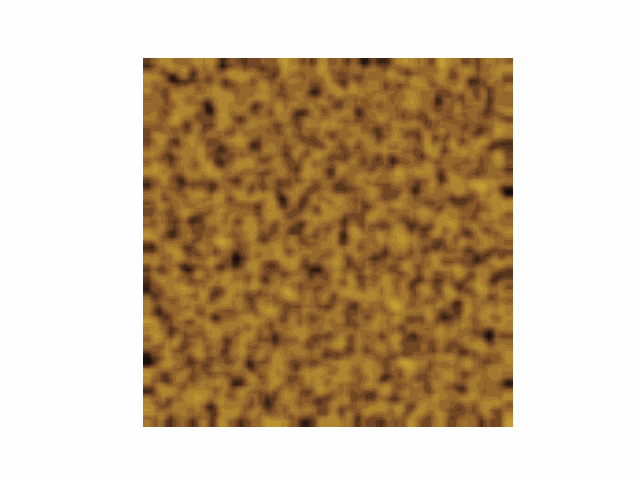

In [35]:
ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation.gif')

### równanie ciepła

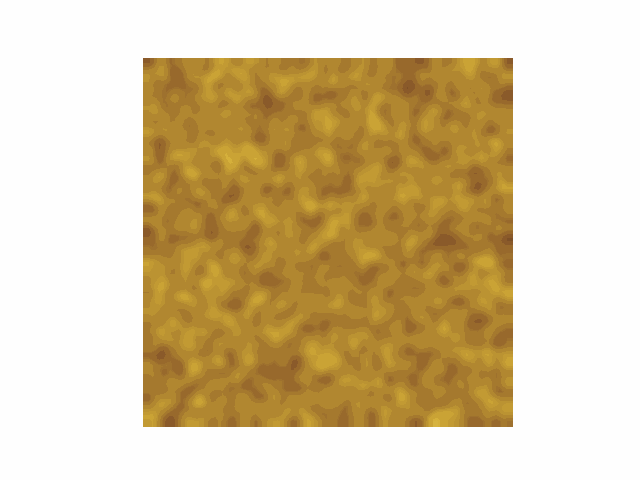

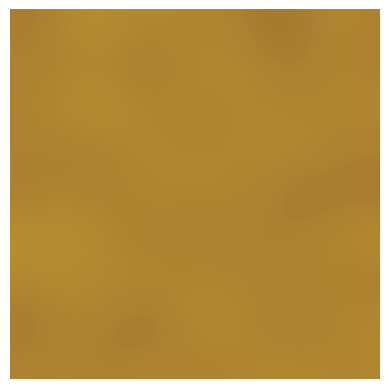

In [36]:
U = np.random.rand(size, size)
V = np.random.rand(size, size)


fig, ax = plt.subplots()
im = ax.imshow(U, cmap=cheetah_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

def update1(frame, U, V):
    for _ in range(400):
        deltaU = laplacian(U)
        deltaV = laplacian(V)
        Uc, Vc = U[1:-1, 1:-1], V[1:-1, 1:-1]
        U[1:-1, 1:-1] = Uc + dt * (a * deltaU)
        V[1:-1, 1:-1] = Vc + dt * (b * deltaV) / tau
        for Z in (U, V):
            Z[0, :] = Z[1, :]
            Z[-1, :] = Z[-2, :]
            Z[:, 0] = Z[:, 1]
            Z[:, -1] = Z[:, -2]
    im.set_array(U)
    return [im]

ani = FuncAnimation(fig, update1, frames=100, blit=True, fargs=(U, V))
ani.save("heat_animation.gif", writer=PillowWriter(fps=7))
Image(filename='heat_animation.gif')

### zebra

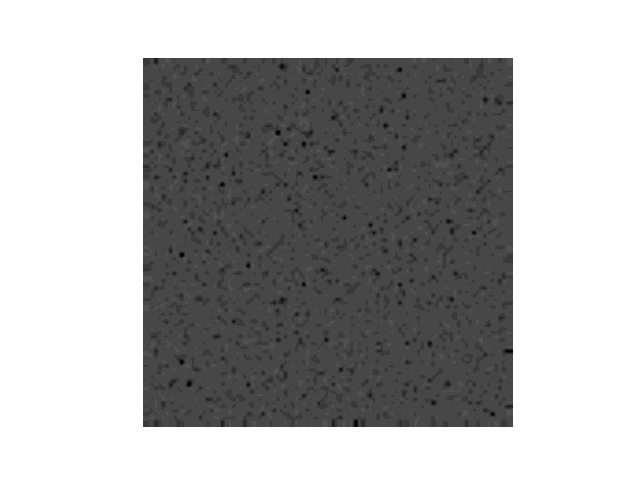

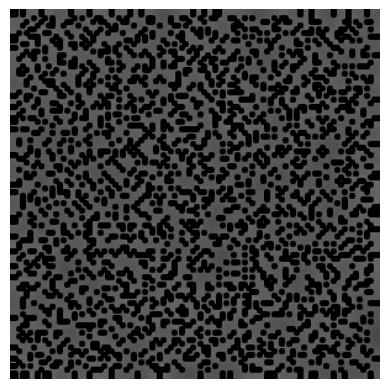

In [37]:
a = 1e-8
b = 5e-3
tau = 0.3
k = 0.055

zebra_colors = ["black", "white"]
zebra_cmap = LinearSegmentedColormap.from_list("zebra", zebra_colors)

U = 1 + 0.2 * np.random.randn(size, size)
V = 0.2 * np.random.randn(size, size)

fig, ax = plt.subplots()
im = ax.imshow(U, cmap=zebra_cmap, interpolation='bilinear', animated=True)
ax.axis('off')

ani = FuncAnimation(fig, update, frames=100, blit=True, fargs=(U, V))
ani.save("turing_animation_zebra.gif", writer=PillowWriter(fps=7))
Image(filename='turing_animation_zebra.gif')